<a href="https://colab.research.google.com/github/douglasmmachado/ExploratoryDataAnalysis/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Data loading and visualization

We have a total of 75692 entries and 21 columns, but we can see that there is missing values in some columns. Also, categorical features such as ID_REF could be written as strings and not as objects for future data manipulations.

In [70]:
raw_data_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/project_database.csv"
df=pd.read_csv(raw_data_url, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75692 entries, 0 to 75691
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            75689 non-null  object 
 1   ID_SITE_RATTACHE  75690 non-null  object 
 2   CODE_ATC          75685 non-null  object 
 3   HOSPI_CODE_UCD    75690 non-null  object 
 4   DATE_MOUV         75685 non-null  object 
 5   N_UFS             75692 non-null  int64  
 6   QUANTITY          75685 non-null  float64
 7   WEEK              75685 non-null  float64
 8   MONTH             75692 non-null  int64  
 9   YEAR              75685 non-null  float64
 10  N_ETB             75692 non-null  int64  
 11  POPULATION        75692 non-null  float64
 12  P_MEDICAL         75692 non-null  int64  
 13  PN_MEDICAL        75692 non-null  int64  
 14  LIT_HC            75685 non-null  float64
 15  LIT_HP            75692 non-null  float64
 16  SEJ_MCO           75692 non-null  int64 

<ipython-input-70-5fa22cf758ba>:2: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(raw_data_url, index_col=0)


In [71]:
'''
From: Correlation analysis of factor impacting health
product consumption in French hospitals

12 main factors:
01 - Size population
02 - Number of physicians for consultations and hospitalization
03 - The number of beds
04 - The Number of medical visits or patient
05 - Facilities geographic position
06 - Type of health facilities
07 - Number of health facilities
08 - Seasonal factors
09 - Number of department or medical unit
10 - Number non-medical Staff (nurses, administration, …)
11 - Medical Specialist (health workers characteristics)
12 - Type of medical department


Table of attributes:
00 - ID_SITE - HOSPITAL_ID
01 - ID_REF - DRUG ID PER HOSPITAL
02 - DESIG - Drug Name
03 - CODE_UCD - Drug UCD code
04 - CODE_DEPT - Hospital district
05 - YEARS - Year of consumption
06 - MONTH - Month of consumption
07 - N_ETB - Numbers of hospital facilities
08 - N_UFS - Numbers of hospital medical units
09 - LIT_HC - Numbers of beds for full hospitalization
10 - LTT_HP - Numbers of beds for partial hospitalization
11 - SEJ_MCO - Numbers of visits in MCO departments
12 - SEJ_HAD - Numbers of visits in HAD departments
13 - SEJ_SLD - Numbers of visits in SLD departments
14 - SEJ_PSY - Numbers of visits in PSY departments
15 - PN_MEDICAL - Numbers of other staff (nurses; midwife)
16 - P_MEDICAL - Numbers of physician
17 - POPULATION - Number of population in the district

'''
df.sample(10)

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
74285,5671,HOSPI_4,C01CA03,3400892508566,2018-05-22,1,350.0,21.0,5,2018.0,...,1859524.0,2627,15723,4477.0,486.0,255490,0,837,8416,209
51110,504200,HOSPI_3,N05CF01,3400891191226,2015-03-23,4,100.0,13.0,3,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
53584,507071,HOSPI_3,H02AB06,3400892203645,2015-12-08,9,355.0,50.0,12,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
19143,960687,HOSPI_1,N02AX02,3400892052120,2017-11-20,4,50.0,47.0,11,2017.0,...,572443.0,806,5303,1360.0,106.0,80667,0,0,1239,122
46942,502369,HOSPI_3,B01AC06,3400892065366,2015-06-25,9,270.0,26.0,6,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
17592,960388,HOSPI_1,C01CA03,3400892508566,2014-08-18,2,160.0,34.0,8,2014.0,...,571632.0,684,5321,1418.0,151.0,71879,0,0,1194,79
15851,960229,HOSPI_1,B05XA09,3400893826706,2015-12-28,4,300.0,53.0,12,2015.0,...,571879.0,684,5295,1411.0,94.0,74102,0,0,1140,57
54864,506197,HOSPI_3,A03AX12,3400893736135,2015-07-01,6,180.0,27.0,7,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
60506,502829,HOSPI_3,C01CA03,3400892508566,2015-12-10,4,250.0,50.0,12,2015.0,...,1120190.0,1239,7161,2053.0,493.0,118924,650,2878,1334,75
27806,9206536,HOSPI_2,B01AC06,3400892065366,2018-07-02,11,400.0,27.0,7,2018.0,...,541454.0,703,5007,1159.0,139.0,74663,0,1193,237,0


In [72]:
duplicateRows = df[df.duplicated()]
duplicateRows

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
9468,890264,HOSPI_1,N02AX02,3400892729589,2016-01-01,1,10.0,53.0,1,2016.0,...,572744.0,683,5273,1388.0,105.0,78311,0,0,1177,51


In [73]:
#Drop duplicates
df = df.drop_duplicates()

## Data comprehension, changing datatype and removing missing data

In [74]:
def display_unique(df, features):
  for column in features:
    print(f'\n Unique values of feature: {column}')
    print(df[column].unique())
    print('\n')

In [75]:
categorical_features = ['ID_REF', 'ID_SITE_RATTACHE', 'CODE_ATC', 'HOSPI_CODE_UCD']
date_features = ['DATE_MOUV', 'WEEK', 'MONTH', 'YEAR']
numerical_features = ['N_UFS', 'QUANTITY', 'N_ETB', 'POPULATION', 'P_MEDICAL', 'PN_MEDICAL', 'LIT_HC', 'LIT_HP', 'SEJ_MCO', 'SEJ_HAD', 'SEJ_PSY', 'SEJ_SSR'] 

In [76]:
display_unique(df, categorical_features)


 Unique values of feature: ID_REF
[960148 893880 960491 800851 820070 800852 890228 830701 890264 830303
 891086 840051 841268 830631 960229 890900 960388 960687 830302 822707
 810359 9199612 9122503 9387549 9276152 9266923 9276169 9206536 9083714
 9272958 9119122 9274584 9220364 9373613 9207576 '9207576' '9382670'
 '9269778' '9250856' '9205212' '9123520' '9208831' '9302263' nan 'X' 'Z'
 '00' '2345' '503129' '507146' '503386' '525441' '502400' '525443'
 '502369' '504394' '503182' '504200' '509929' '507071' '506197' '504495'
 '525057' '503095' '502829' '503184' '504403' '502374' '501463' 501463
 2463 5268 20395 7047 8704 7046 9490 3937 5186 20677 20420 8927 20845 2431
 5589 5066 5671 5193 2612 6180 21099]



 Unique values of feature: ID_SITE_RATTACHE
['HOSPI_1' 'HOSPI_2' nan 'HOSPI_3' 'HOSPI_4']



 Unique values of feature: CODE_ATC
['N02BE01' 'A12BA01' 'B05XA03' 'B01AB05' 'B01AC06' 'N05BA04' 'N02AX02'
 'N05CF01' 'R03AC02' 'H02AB06' 'A03AX12' 'N05BA12' 'B05XA09' 'M03BX01'
 'C01CA03' 

In [77]:
#This two rows are almost full of missing data, the best approach would be remove them
df[df['ID_SITE_RATTACHE'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
37844,Z,NaN,NaN,NaN,NaN,14,NaN,NaN,12,NaN,...,12.0,14,14,NaN,12.0,12,14,14,12,12
37845,00,NaN,NaN,NaN,NaN,1,NaN,NaN,1236987,NaN,...,1236987.0,1,1,NaN,1236987.0,1236987,1,1,1236987,1236987


In [78]:
df = df.dropna(subset=['ID_SITE_RATTACHE'])

In [79]:
df[df['ID_REF'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
37842,NaN,HOSPI_2,NaN,AZU,NaN,10,NaN,NaN,147,NaN,...,147.0,10,10,NaN,147.0,147,10,10,147,147
37846,NaN,HOSPI_3,NaN,45f,NaN,0,NaN,NaN,45,NaN,...,45.0,0,0,NaN,45.0,45,0,0,45,45
37847,NaN,HOSPI_1,NaN,45,NaN,6,NaN,NaN,23,NaN,...,23.0,6,6,NaN,23.0,23,6,6,23,23


In [80]:
df = df.dropna(subset=['ID_REF'])

In [81]:
df[df['CODE_ATC'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
37843,X,HOSPI_1,NaN,3333#,NaN,56,NaN,NaN,4578975,NaN,...,4578975.0,56,56,NaN,4578975.0,4578975,56,56,4578975,4578975
37848,2345,HOSPI_4,NaN,GHAtvw,NaN,81,NaN,NaN,789,NaN,...,789.0,81,81,NaN,789.0,789,81,81,789,789


In [82]:
df = df.dropna(subset=['CODE_ATC'])

In [83]:
df[df['HOSPI_CODE_UCD'].isna()]

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD


In [84]:
'''
  We can notice that all missing values from categorical features were removed, also, some strange
  values that were different from the rest were removed, leading to an understanding of 
  wrong inputs in database

  Also, we can notice that for the categorical features, the problem of type persists, as
  some values are numbers and other are strings, to solve that I'm going to convert
  all to strings
'''
display_unique(df, categorical_features)


 Unique values of feature: ID_REF
[960148 893880 960491 800851 820070 800852 890228 830701 890264 830303
 891086 840051 841268 830631 960229 890900 960388 960687 830302 822707
 810359 9199612 9122503 9387549 9276152 9266923 9276169 9206536 9083714
 9272958 9119122 9274584 9220364 9373613 9207576 '9207576' '9382670'
 '9269778' '9250856' '9205212' '9123520' '9208831' '9302263' '503129'
 '507146' '503386' '525441' '502400' '525443' '502369' '504394' '503182'
 '504200' '509929' '507071' '506197' '504495' '525057' '503095' '502829'
 '503184' '504403' '502374' '501463' 501463 2463 5268 20395 7047 8704 7046
 9490 3937 5186 20677 20420 8927 20845 2431 5589 5066 5671 5193 2612 6180
 21099]



 Unique values of feature: ID_SITE_RATTACHE
['HOSPI_1' 'HOSPI_2' 'HOSPI_3' 'HOSPI_4']



 Unique values of feature: CODE_ATC
['N02BE01' 'A12BA01' 'B05XA03' 'B01AB05' 'B01AC06' 'N05BA04' 'N02AX02'
 'N05CF01' 'R03AC02' 'H02AB06' 'A03AX12' 'N05BA12' 'B05XA09' 'M03BX01'
 'C01CA03' 'N05CF02' 'C03CA01' 'J01CR05

In [85]:
for column in categorical_features:
  df[column] = df[column].astype('string')

df['DATE_MOUV'] = pd.to_datetime(df['DATE_MOUV'], 
               format='%Y-%m-%d')  # Changed the type of date too
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75684 entries, 0 to 75691
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            75684 non-null  string        
 1   ID_SITE_RATTACHE  75684 non-null  string        
 2   CODE_ATC          75684 non-null  string        
 3   HOSPI_CODE_UCD    75684 non-null  string        
 4   DATE_MOUV         75684 non-null  datetime64[ns]
 5   N_UFS             75684 non-null  int64         
 6   QUANTITY          75684 non-null  float64       
 7   WEEK              75684 non-null  float64       
 8   MONTH             75684 non-null  int64         
 9   YEAR              75684 non-null  float64       
 10  N_ETB             75684 non-null  int64         
 11  POPULATION        75684 non-null  float64       
 12  P_MEDICAL         75684 non-null  int64         
 13  PN_MEDICAL        75684 non-null  int64         
 14  LIT_HC            7568

In [86]:
df.sample(2)

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,DATE_MOUV,N_UFS,QUANTITY,WEEK,MONTH,YEAR,...,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
67290,20395,HOSPI_4,N02BE01,3400893875490,2017-10-27,3,4120.0,43.0,10,2017.0,...,1843319.0,2556,15650,4500.0,467.0,254570,0,5,8464,285
19591,830302,HOSPI_1,N05CF02,3400891235203,2014-08-01,4,80.0,31.0,8,2014.0,...,571632.0,684,5321,1418.0,151.0,71879,0,0,1194,79


## Handling outliers

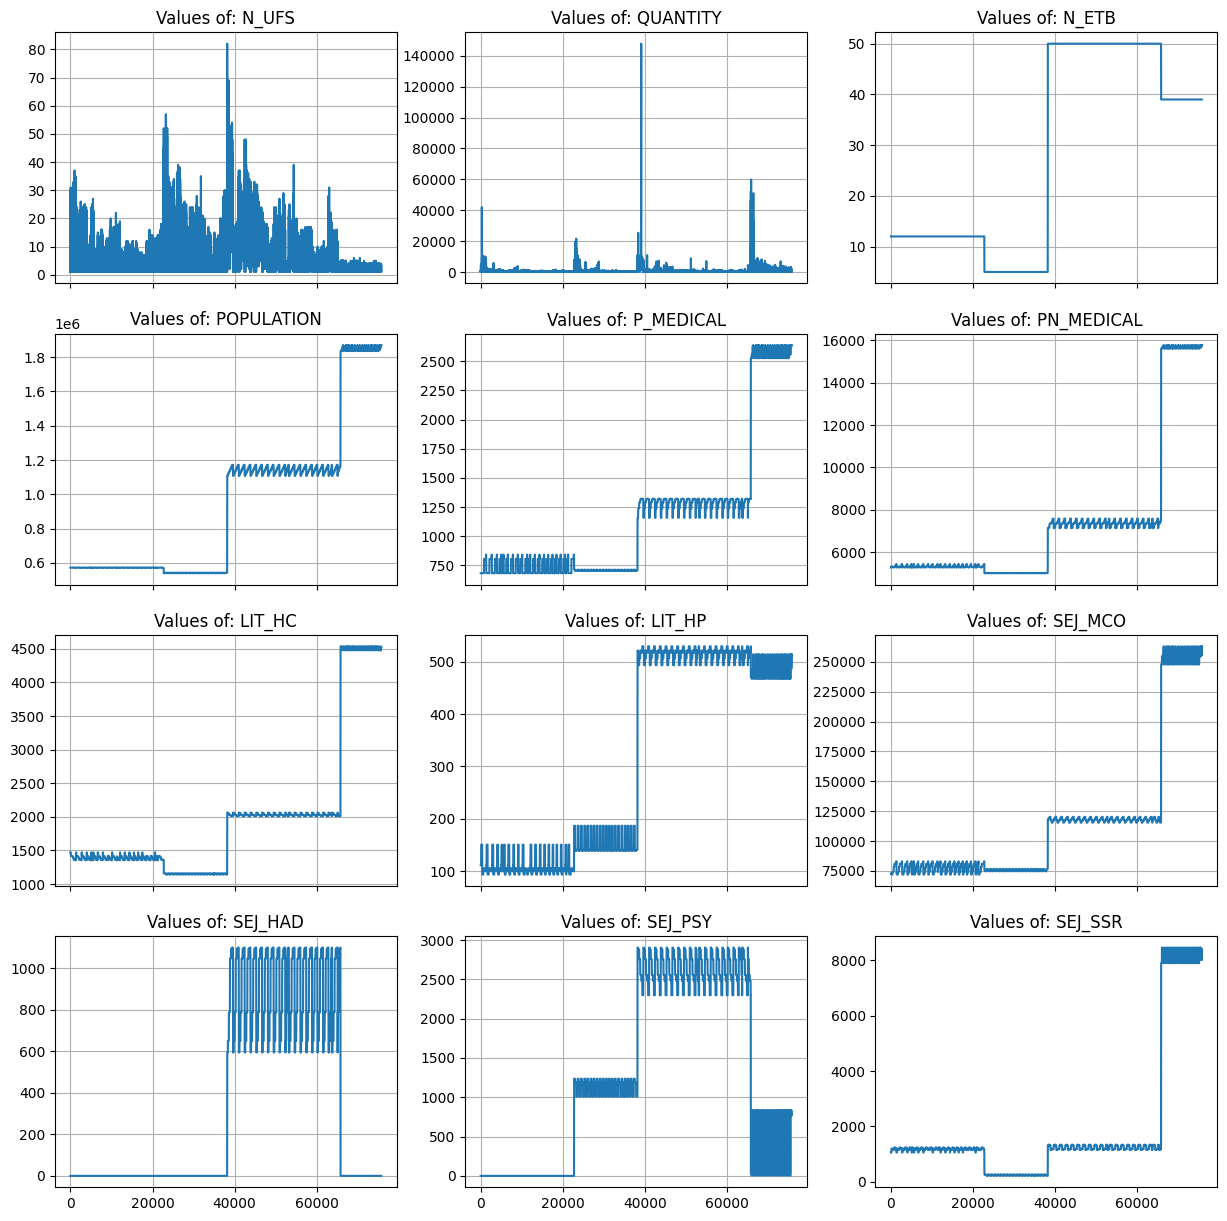

In [102]:

fig, axs = plt.subplots(4, 3, sharex=True, figsize = (15,15))

i = 0
j = 0

for column in numerical_features:
  axs[i, j].plot(df[column])
  axs[i, j].set_title('Values of: ' + str(column))
  axs[i, j].grid(True)
  plt.grid()
  if j == 2:
    i += 1
    j = 0
  else:
    j+=1
  
  

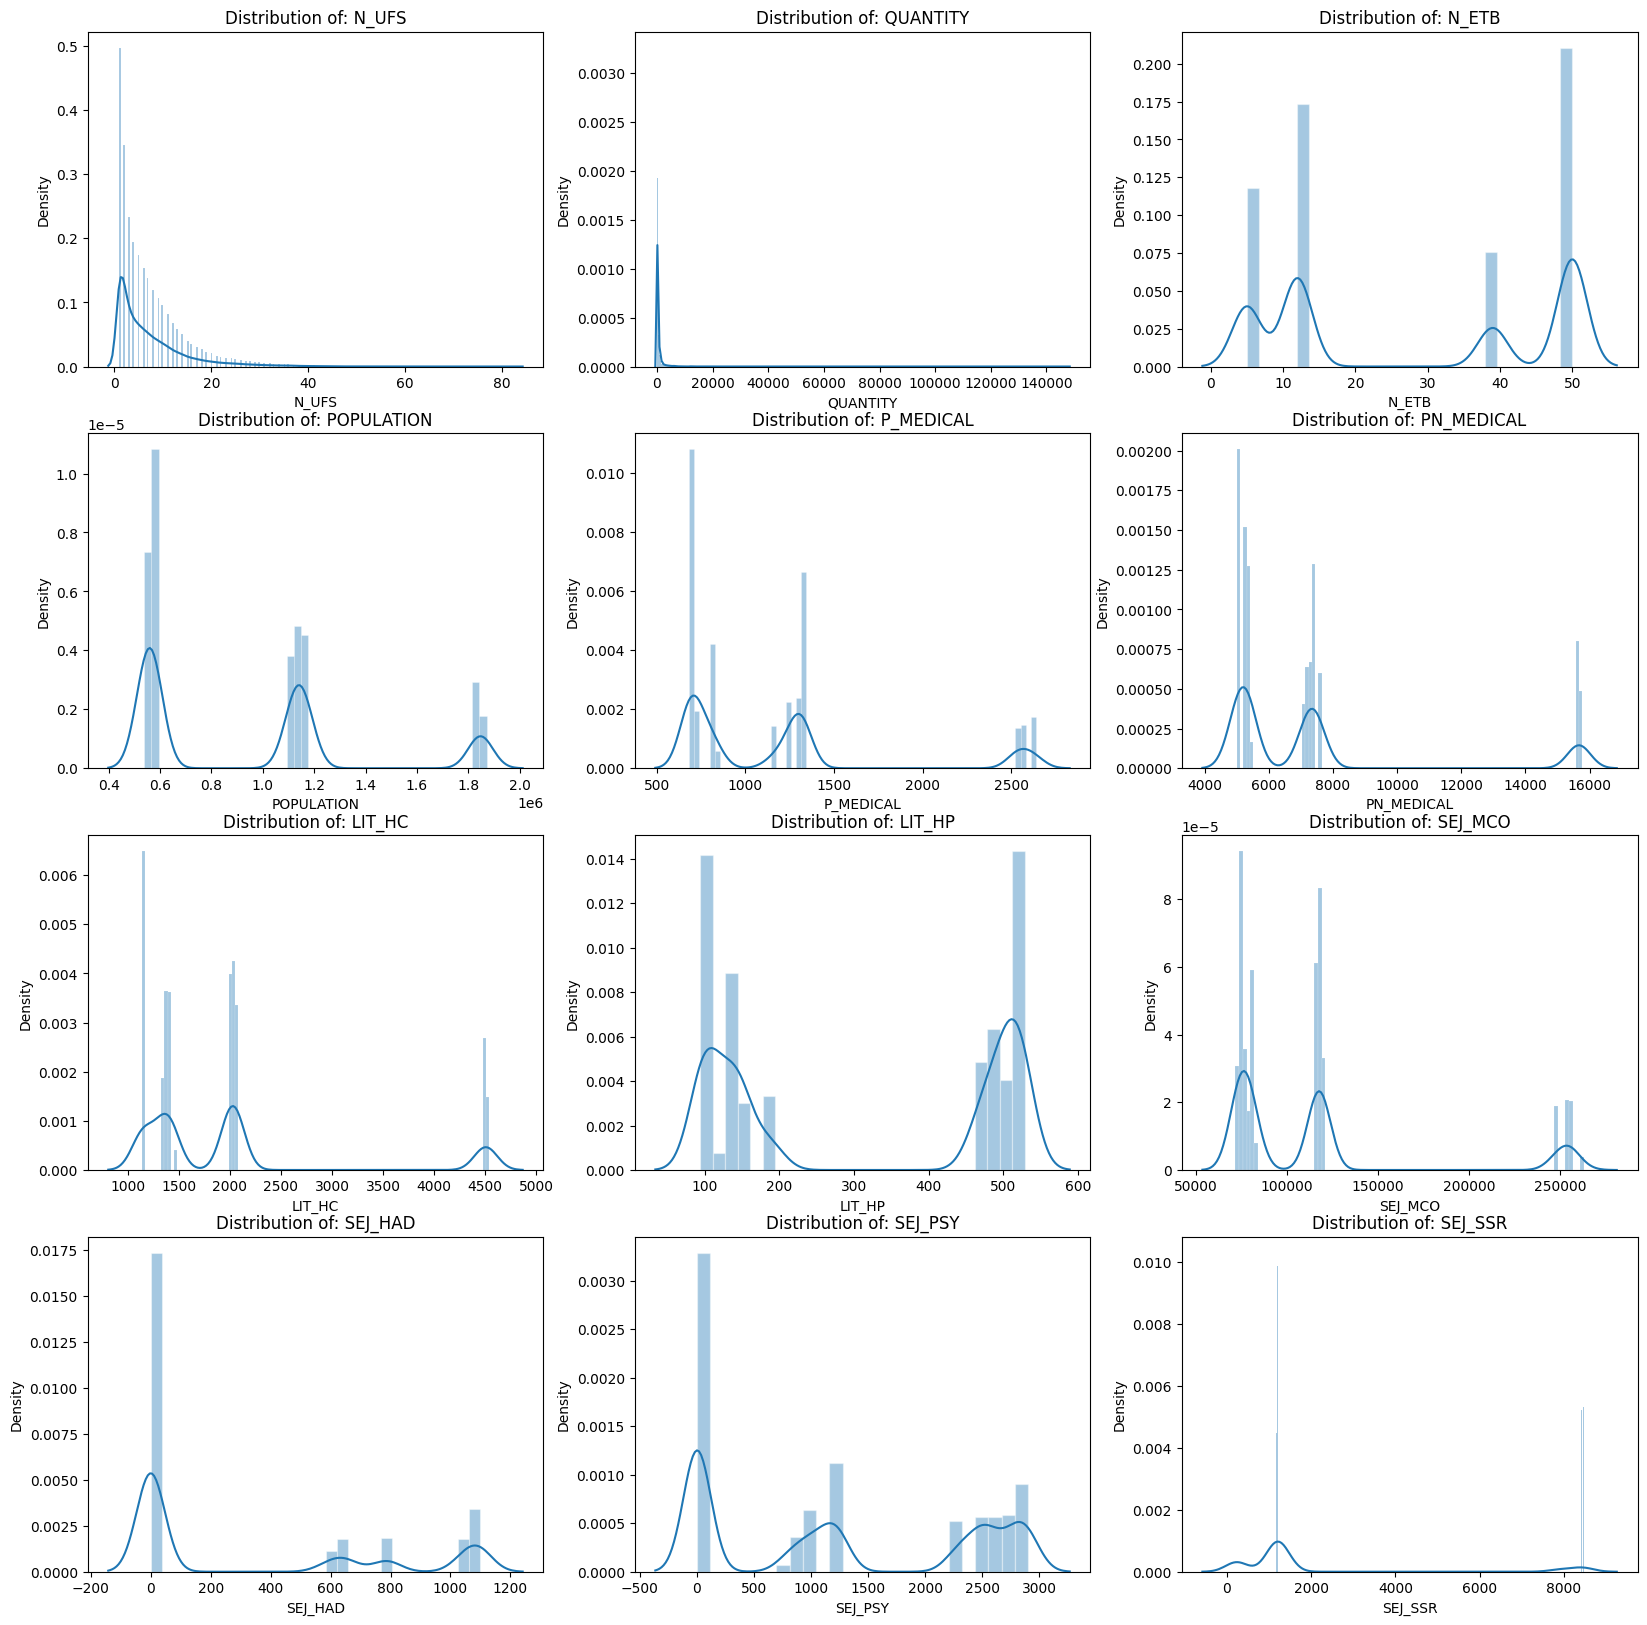

In [131]:
'''
  Plot of distribution for the numerical features before removing the outliers
'''

fig, axes = plt.subplots(4, 3,sharex=False, figsize=(20,20))

i = 0
j = 0
for column in numerical_features:
  sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),ax=axes[i, j]).set(title='Distribution of: ' + str(column))
  if j == 2:
    i += 1
    j = 0
  else:
    j+=1

In [134]:
'''
  For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
  It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
  all(axis=1) ensures that for each row, all column satisfy the constraint.
  Finally, the result of this condition is used to index the dataframe.

  Z-score:

  Simply put, a z-score (also called a standard score) gives you an idea of how far from the
  mean a data point is. But more technically it’s a measure of how many standard deviations
  below or above the population mean a raw score is.
'''
for column in numerical_features:
  df = df[(np.abs(stats.zscore(df[column])) < 3)]

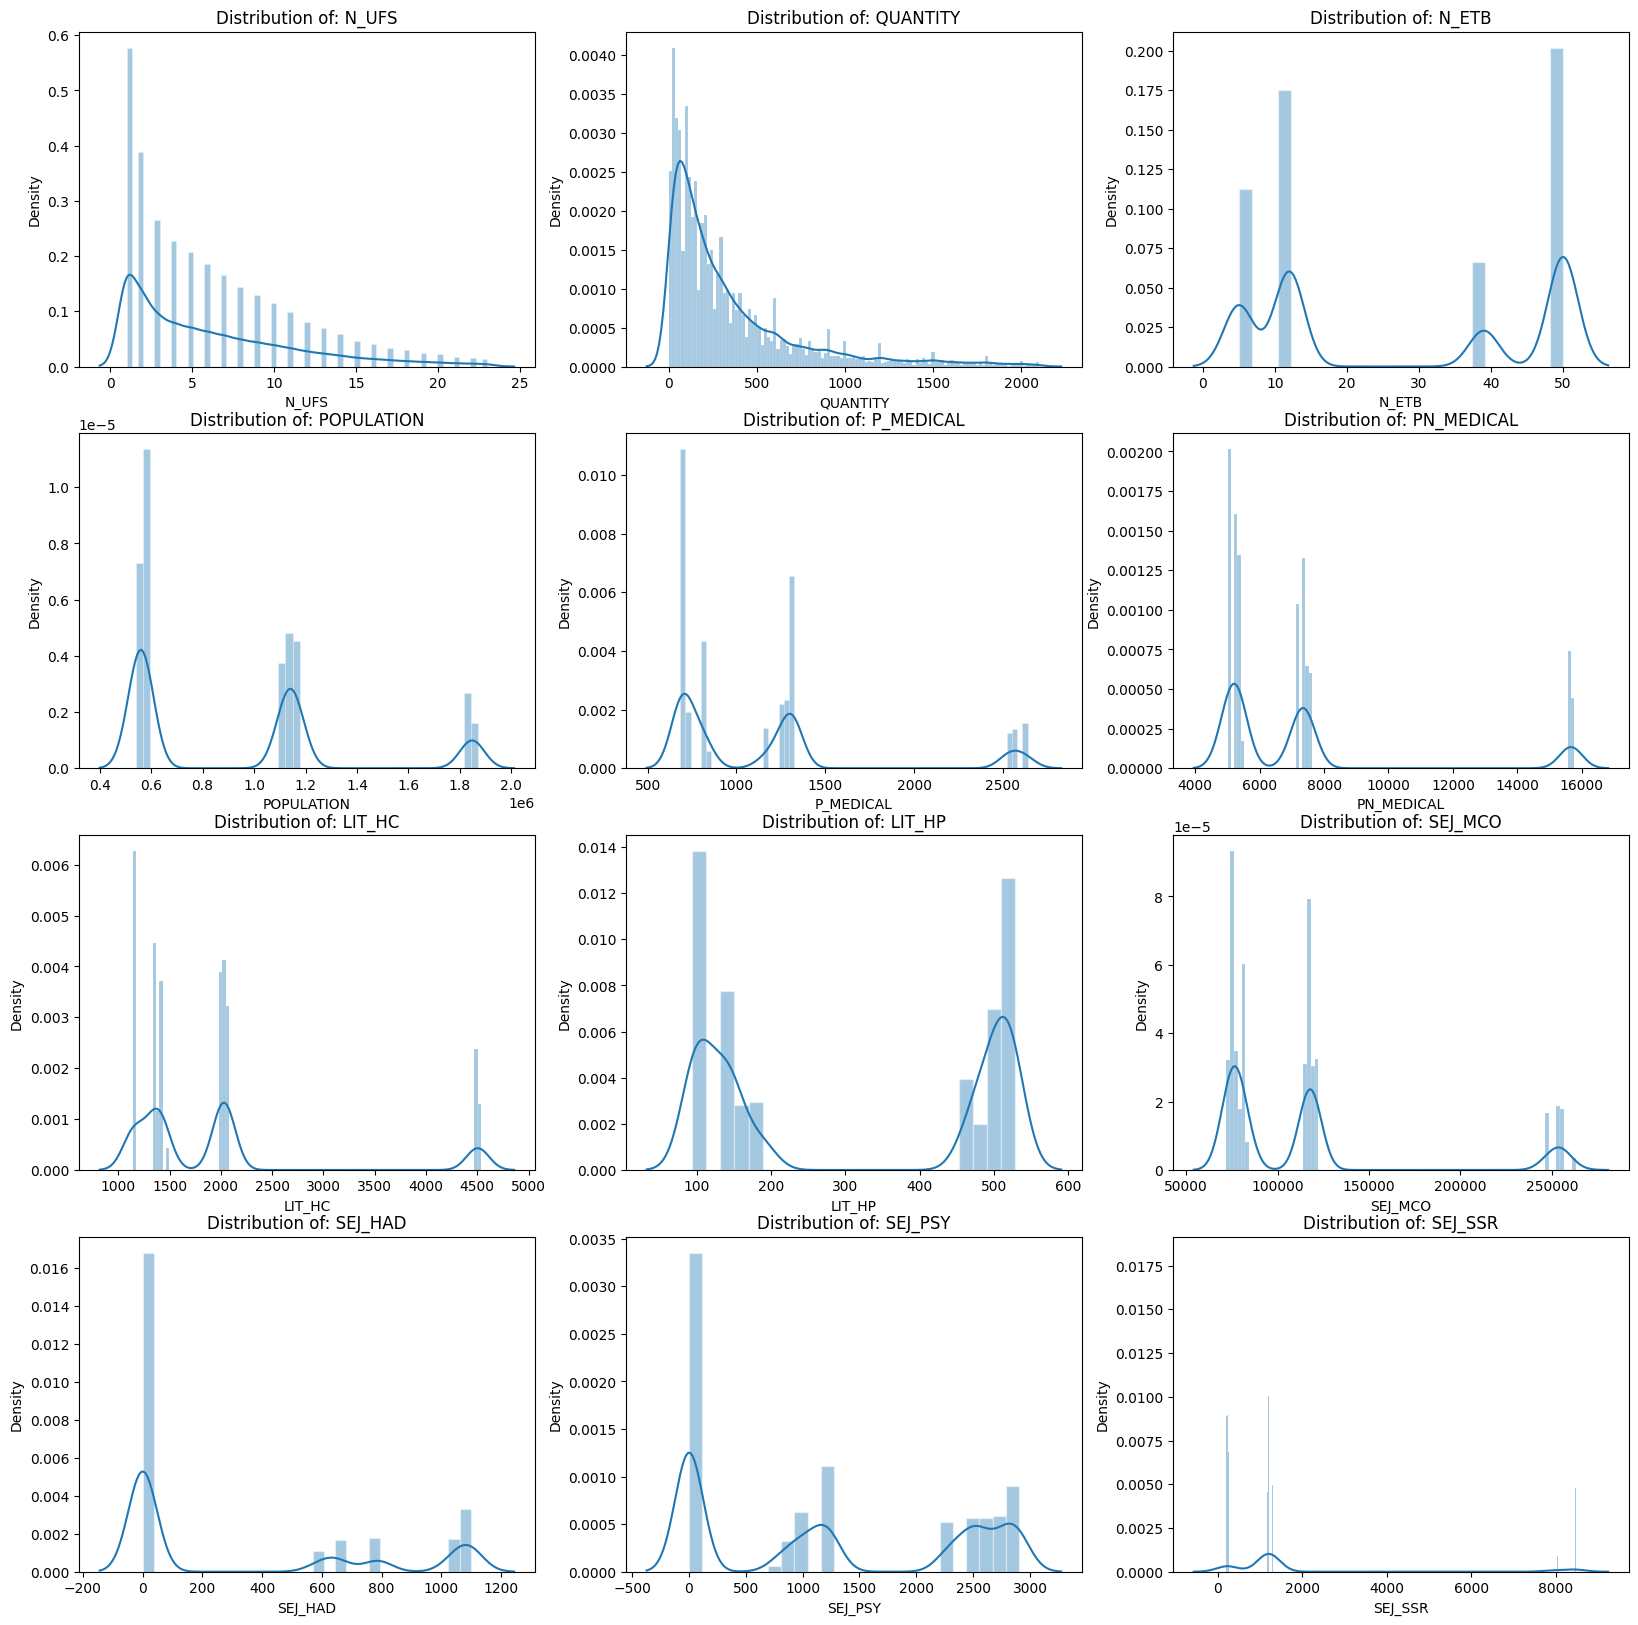

In [135]:
'''
  Plot of distribution for the numerical features after removing the outliers
'''

fig, axes = plt.subplots(4, 3,sharex=False, figsize=(20,20))

i = 0
j = 0
for column in numerical_features:
  sns.histplot(df[column], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),ax=axes[i, j]).set(title='Distribution of: ' + str(column))
  if j == 2:
    i += 1
    j = 0
  else:
    j+=1

# Correlation analysis


<ipython-input-144-1f1b17f16482>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

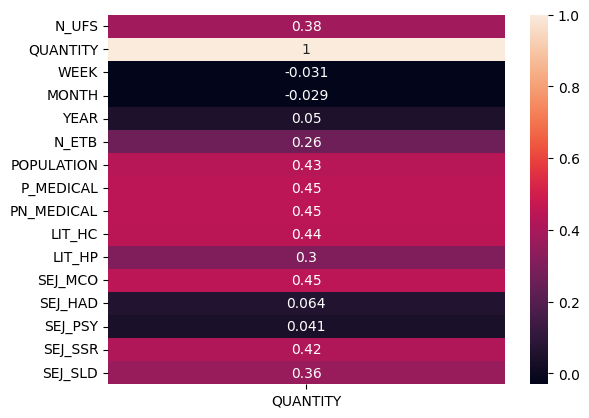

In [144]:
corr = df.corr()
x = corr[['QUANTITY']]
sns.heatmap(x,annot=True)

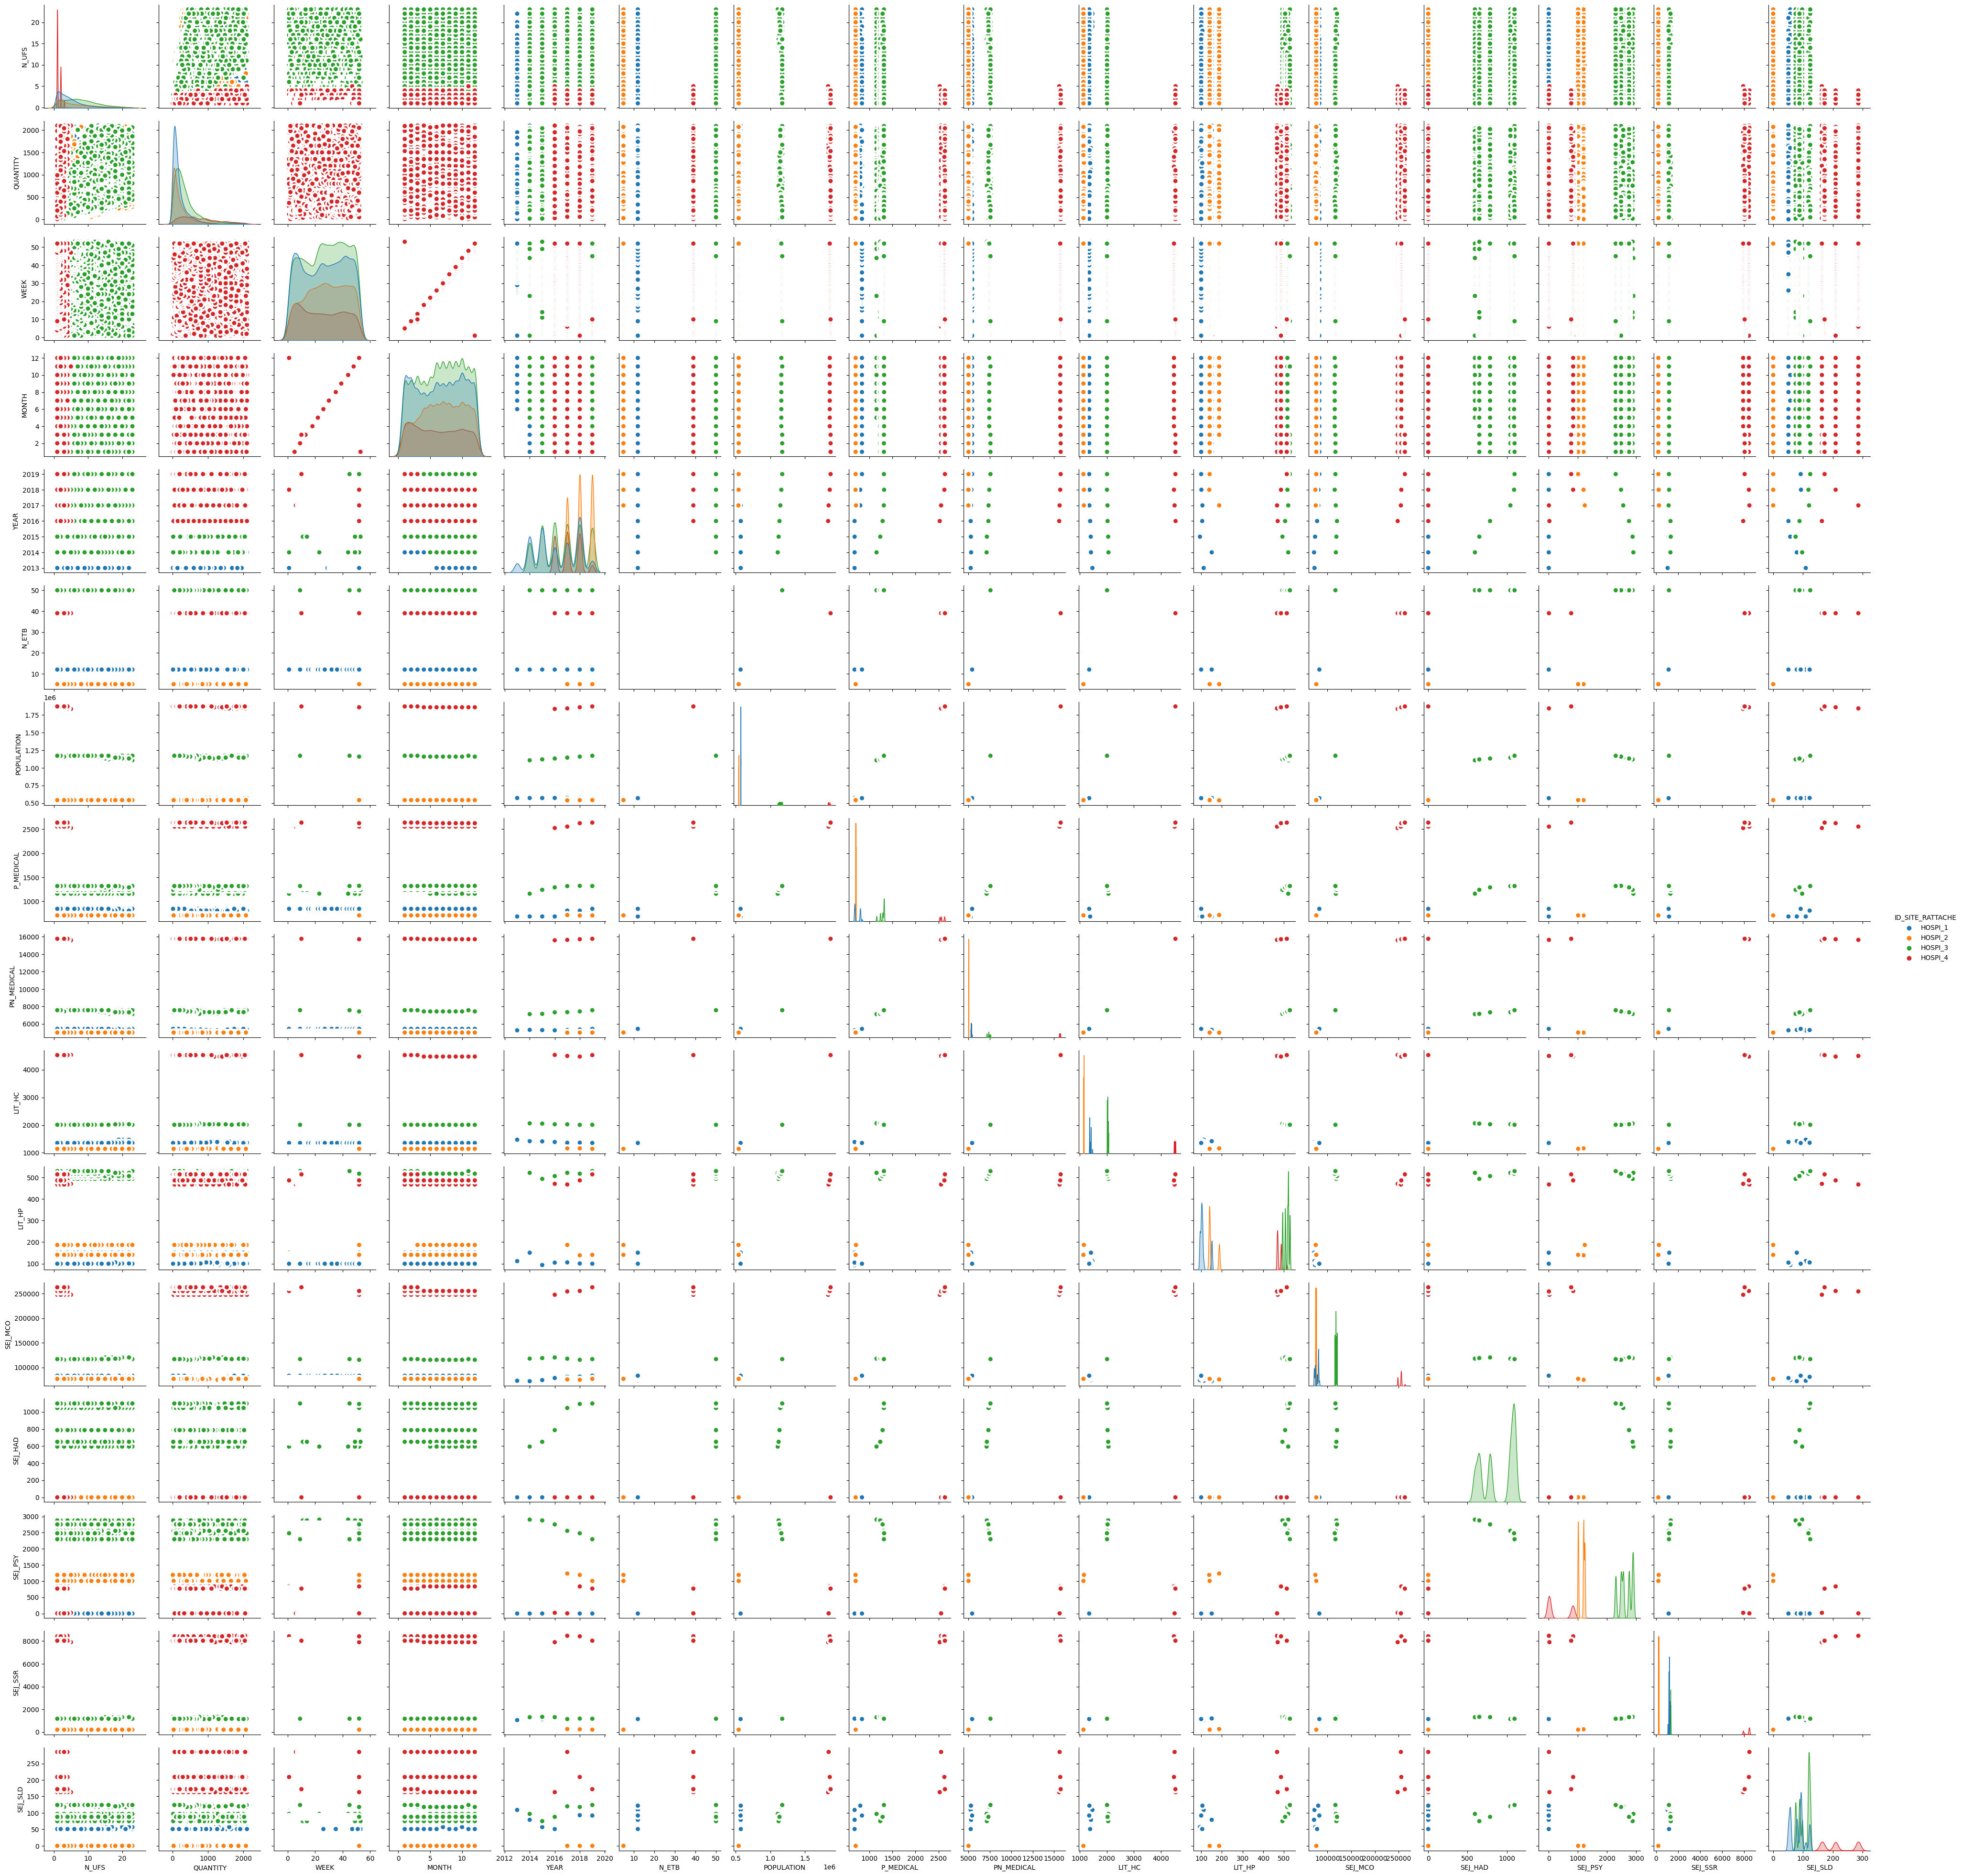

In [146]:
sns.pairplot(df, kind="scatter", hue="ID_SITE_RATTACHE", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()